In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits 
#digits dataset from scikit learn consists of 8x8 pixel images of digits

#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
digits = load_digits() #load the dataset in digits
digits.data.shape

(1797, 64)

In [34]:
digits.keys()
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:

df = pd.DataFrame(digits.data) #display the first 5 rows of the dataset


In [42]:
k_means = KMeans(n_clusters=10, max_iter=1000, random_state=42) #initialize KMeans with 10 clusters
clusters = k_means.fit_predict(digits.data) #run KMeans clustering on digits.data for 1797 records and 64 features
k_means.cluster_centers_.shape


(10, 64)

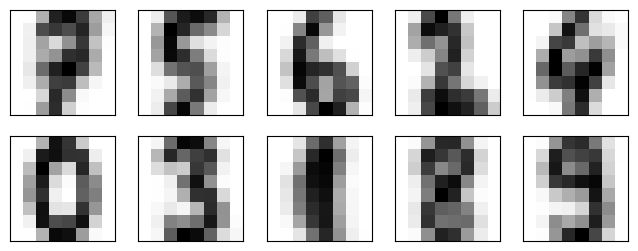

In [45]:
fig, ax = plt.subplots(2, 5, figsize = (8,3))  #Create a figure and a set of subplots( 2 rows and 5 columns)
centers = k_means.cluster_centers_
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center.reshape(8, 8), interpolation='nearest', cmap=plt.cm.binary) #reshape the center to 8x8 pixel image


In [70]:
from scipy.spatial.distance import cdist
# Calculate the distances between each data point and the cluster centers
distances = cdist(digits.data, centers)

# Assign labels based on the nearest cluster center
labels = distances.argmin(axis=1).reshape(digits.target.shape)
df['labels'] = labels
df['real'] = digits.target

df



,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,labels,real
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,5,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,7,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,7,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,6,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,5,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9,9


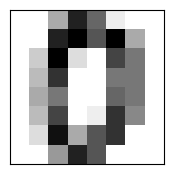

In [71]:
import matplotlib.pyplot as plt
df_without = df.drop(['real', 'labels'], axis=1)
fig, ax = plt.subplots(1, 1, figsize=(2, 2))  # Create a figure and axes for the plot
ax.imshow(df_without.iloc[0].values.reshape(8, 8), cmap=plt.cm.binary, interpolation='nearest')  # Reshape and plot the first element
ax.set(xticks=[], yticks=[])  # Remove the tick marks
plt.show()  # Show the plot